# Cálculo de la Curva de Huff

## Bibliotecas

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.interpolate import make_interp_spline


## Carga del Archivo

In [3]:
df = pd.read_excel("EST. 45.xlsx")
df['FechaHora'] = pd.to_datetime(df['Fecha'], errors='coerce')
df['Fecha'] = df['FechaHora'].dt.strftime('%Y-%m-%d')
df['Hora'] = df['FechaHora'].dt.strftime('%H')
display(df)

,Fecha,Valor,Duración,Intensidad,Intesidad maxima en 10 minutos,Intensidad maxima por evento,FechaHora,Hora
0,2017-01-01,0.0,NaN,NaN,NaN,NaN,2017-01-01 10:40:00,10
1,2017-01-01,0.0,NaN,NaN,NaN,NaN,2017-01-01 10:50:00,10
2,2017-01-01,0.0,NaN,NaN,NaN,NaN,2017-01-01 11:00:00,11
3,2017-01-01,0.0,NaN,NaN,NaN,NaN,2017-01-01 11:10:00,11
4,2017-01-01,0.0,NaN,NaN,NaN,NaN,2017-01-01 11:20:00,11
...,...,...,...,...,...,...,...,...
199831,2023-03-17,0.0,NaN,NaN,NaN,NaN,2023-03-17 01:10:00,01
199832,2023-03-17,0.0,NaN,NaN,NaN,NaN,2023-03-17 01:20:00,01
199833,2023-03-17,0.0,NaN,NaN,NaN,NaN,2023-03-17 01:30:00,01
199834,2023-03-17,0.0,NaN,NaN,NaN,NaN,2023-03-17 01:40:00,01


## Filtrado de Eventos de lluvia con una duración mayor o igual de 5  y menor o igual que 6.

In [5]:
df_event_5_a_6_hours = df[(df['Duración'] >= 5) & (df['Duración'] <= 6) ]
display(df_event_5_a_6_hours )

,Fecha,Valor,Duración,Intensidad,Intesidad maxima en 10 minutos,Intensidad maxima por evento,FechaHora,Hora
12153,2017-04-16,0.46,5.333333,1.393125,2.44,2.54,2017-04-16 22:50:00,22
12154,2017-04-16,0.39,5.333333,1.393125,2.54,2.54,2017-04-16 23:00:00,23
12155,2017-04-16,0.37,5.333333,1.393125,2.46,2.54,2017-04-16 23:10:00,23
12156,2017-04-16,0.51,5.333333,1.393125,2.24,2.54,2017-04-16 23:20:00,23
12157,2017-04-16,0.35,5.333333,1.393125,1.72,2.54,2017-04-16 23:30:00,23
...,...,...,...,...,...,...,...,...
70334,2018-09-21,8.29,5.833333,43.983429,46.16,82.60,2018-09-21 11:20:00,11
70335,2018-09-21,7.51,5.833333,43.983429,46.64,82.60,2018-09-21 11:30:00,11
70336,2018-09-21,7.28,5.833333,43.983429,61.98,82.60,2018-09-21 11:40:00,11
70337,2018-09-21,8.53,5.833333,43.983429,47.42,82.60,2018-09-21 11:50:00,11


## Cálculo precipitación  por horas.

In [101]:
df3 = df_event_5_a_6_hours.groupby(['Hora'])['Valor'].sum().reset_index()
display(df3)

,Hora,Valor
0,12,2.4
1,13,15.0
2,14,2.8
3,15,1.4
4,16,1.1
5,17,0.7


## Cálculo de la máxima precipitación por eventos con duracción mayor a 5 y menor a 6 horas 

In [102]:
min_duration= df3['Valor'].min()
max_duration = df3['Valor'].max()
display(min_duration,max_duration)

np.float64(0.7000000000000001)

np.float64(15.0)

In [103]:
def calculeValueH(valor):
    return valor / max_duration


In [104]:
df3['valor/ValorMax'] = df3['Valor'].apply(calculeValueH)
df3['HoraFloat'] = df3['Hora'].astype(float)
display(df3)

,Hora,Valor,valor/ValorMax,HoraFloat
0,12,2.4,0.160000,12.0
1,13,15.0,1.000000,13.0
2,14,2.8,0.186667,14.0
3,15,1.4,0.093333,15.0
4,16,1.1,0.073333,16.0
5,17,0.7,0.046667,17.0


## Curva HUFF no suavisada

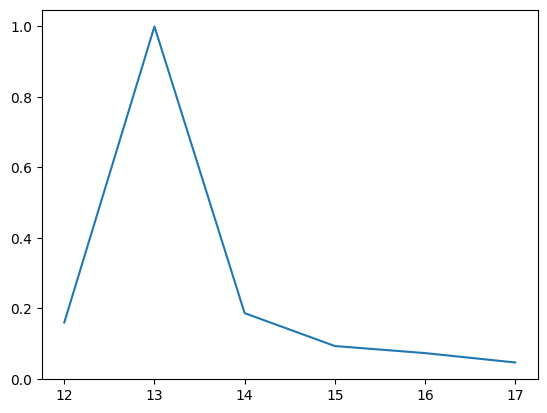

In [105]:
plt.plot(df3['Hora'],df3['valor/ValorMax'], linestyle='solid')  # fallback

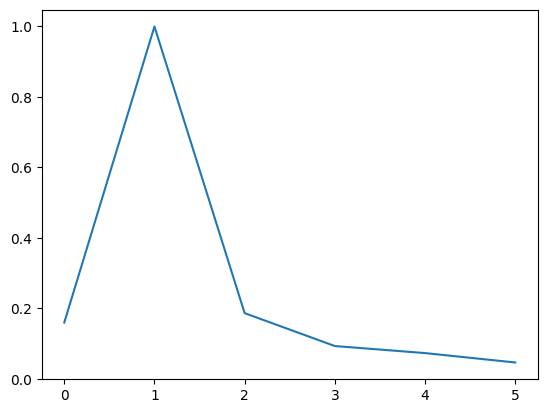

In [106]:
plt.plot(df3.index,df3['valor/ValorMax'], linestyle='solid')  # fallback

## Curva Huff suavida por interpolación

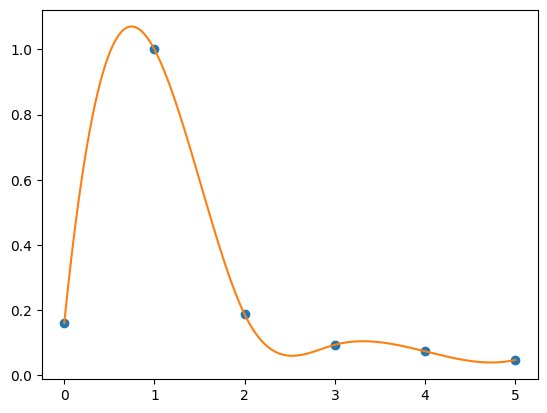

In [107]:
spline = make_interp_spline(df3.index, df3['valor/ValorMax'], k=3)  # k=3 para splines cúbicos
x_suave = np.linspace(df3.index.min(), df3.index.max(), 500)
y_suave = spline(x_suave)
plt.plot(df3.index, df3['valor/ValorMax'], 'o', label='Datos originales')
plt.plot(x_suave, y_suave, label='Curva suavizada')